c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2476 - val_loss: 0.0626
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0511 - val_loss: 0.0291
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0243 - val_loss: 0.0032
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7921e-04 - val_loss: 4.5793e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7621e-04 - val_loss: 1.6852e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4556e-04 - val_loss: 6.2302e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8555e-05 - val_loss: 2.3154e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7532e-05 - val_loss: 8.6838e-06
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.3855e-06 - val_loss: 6.2284e-06
Epoch 12/20
24/24 ━

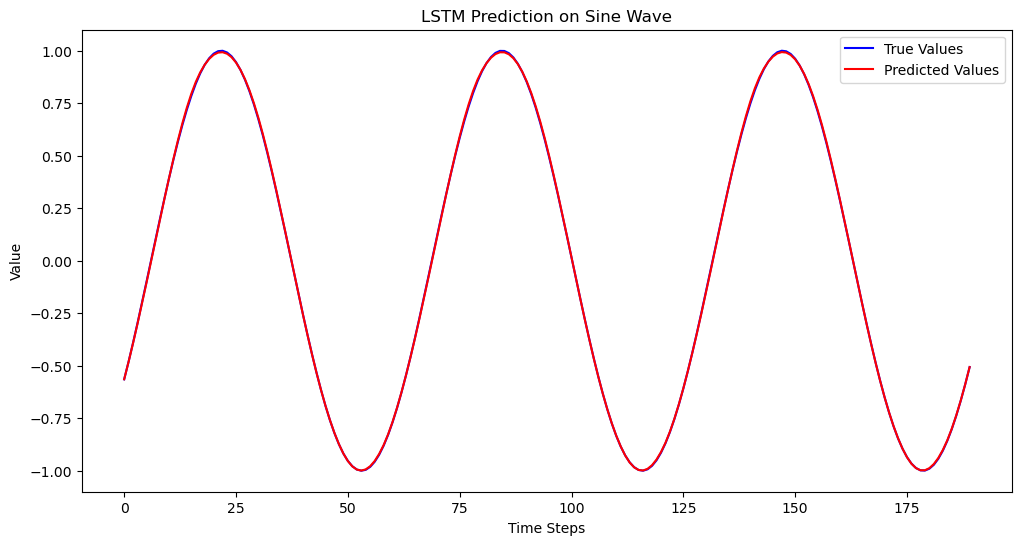

In [2]:
#LSTM stannds for Long Short Term Memory.
#this is a simple LSTM model to predict the next value in a sine wave sequence.
#The model is trained on a sine wave sequence and then tested on the remaining sequence.
#The model is trained on 80% of the data and tested on the remaining 20%.




import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

#generate sine wave data.
def generate_sine_wave_data(samples=1000, sequence_length=50):
    x = np.linspace(0, 100, samples)
    y = np.sin(x)
    data = []
    for i in range(len(y) - sequence_length):
        data.append(y[i:i+sequence_length+1])  
    data = np.array(data)
    return data[:, :-1], data[:, -1]  


sequence_length = 50
samples = 1000


X, y = generate_sine_wave_data(samples, sequence_length)

#the LSTM model expects a 3D input so we need to reshape the data.
X = X.reshape((X.shape[0], X.shape[1], 1))  
scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y = scaler.fit_transform(y.reshape(-1, 1))

#split the data into training and testing sets.
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#train the LSTM model.
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")


y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  
y_test_rescaled = scaler.inverse_transform(y_test) 

#plot the predicted values against the true values.
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title("LSTM Prediction on Sine Wave")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()
